In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = "/kaggle/input/eeg-train/train_data"

# Define class labels according to the provided table
class_labels = ["Normal", "Complex_Partial_Seizures", "Electrographic_Seizures", "Video_detected_Seizures_with_no_visual_change_over_EEG"]

# Initialize data and labels
X, y = [], []

for label, class_name in enumerate(class_labels):
    class_folder = os.path.join(dataset_path, class_name)
    for file_name in os.listdir(class_folder):
        if file_name.endswith(".npy"):
            file_path = os.path.join(class_folder, file_name)
            data = np.load(file_path)
            X.append(data)
            y.append(label)  # Use folder index as label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes to verify
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")



Data shape: (5608, 19, 500)
Labels shape: (5608,)


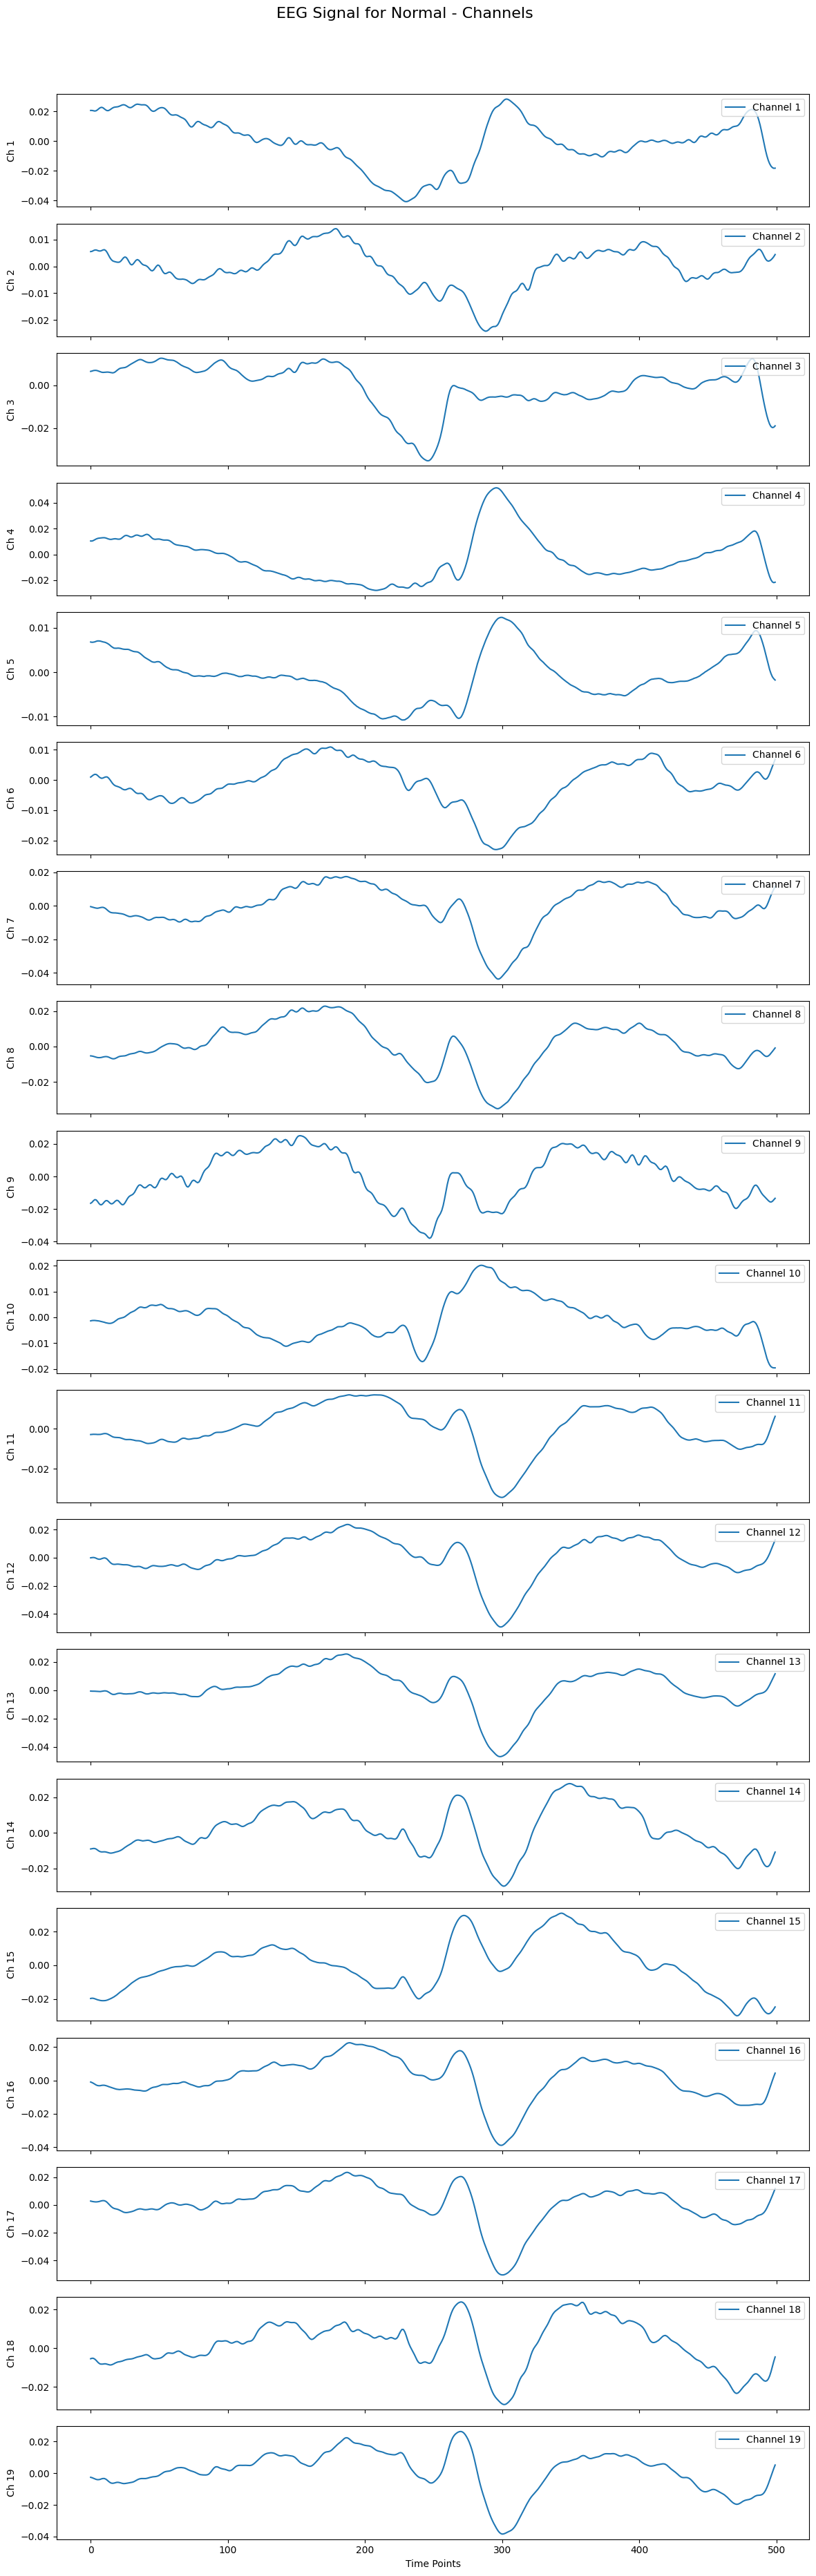

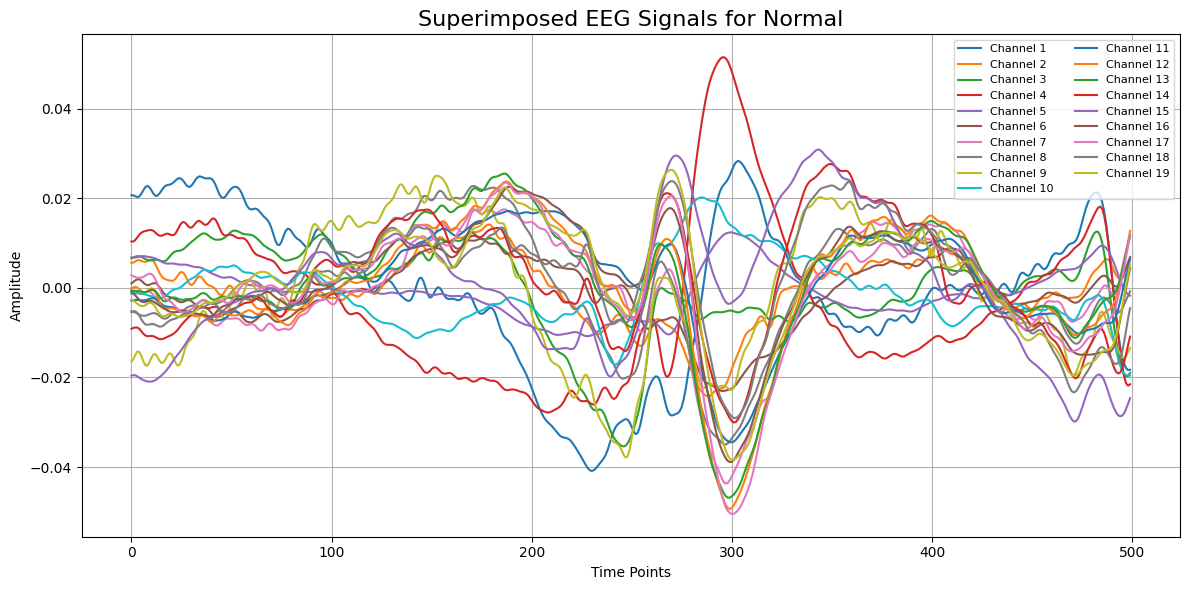

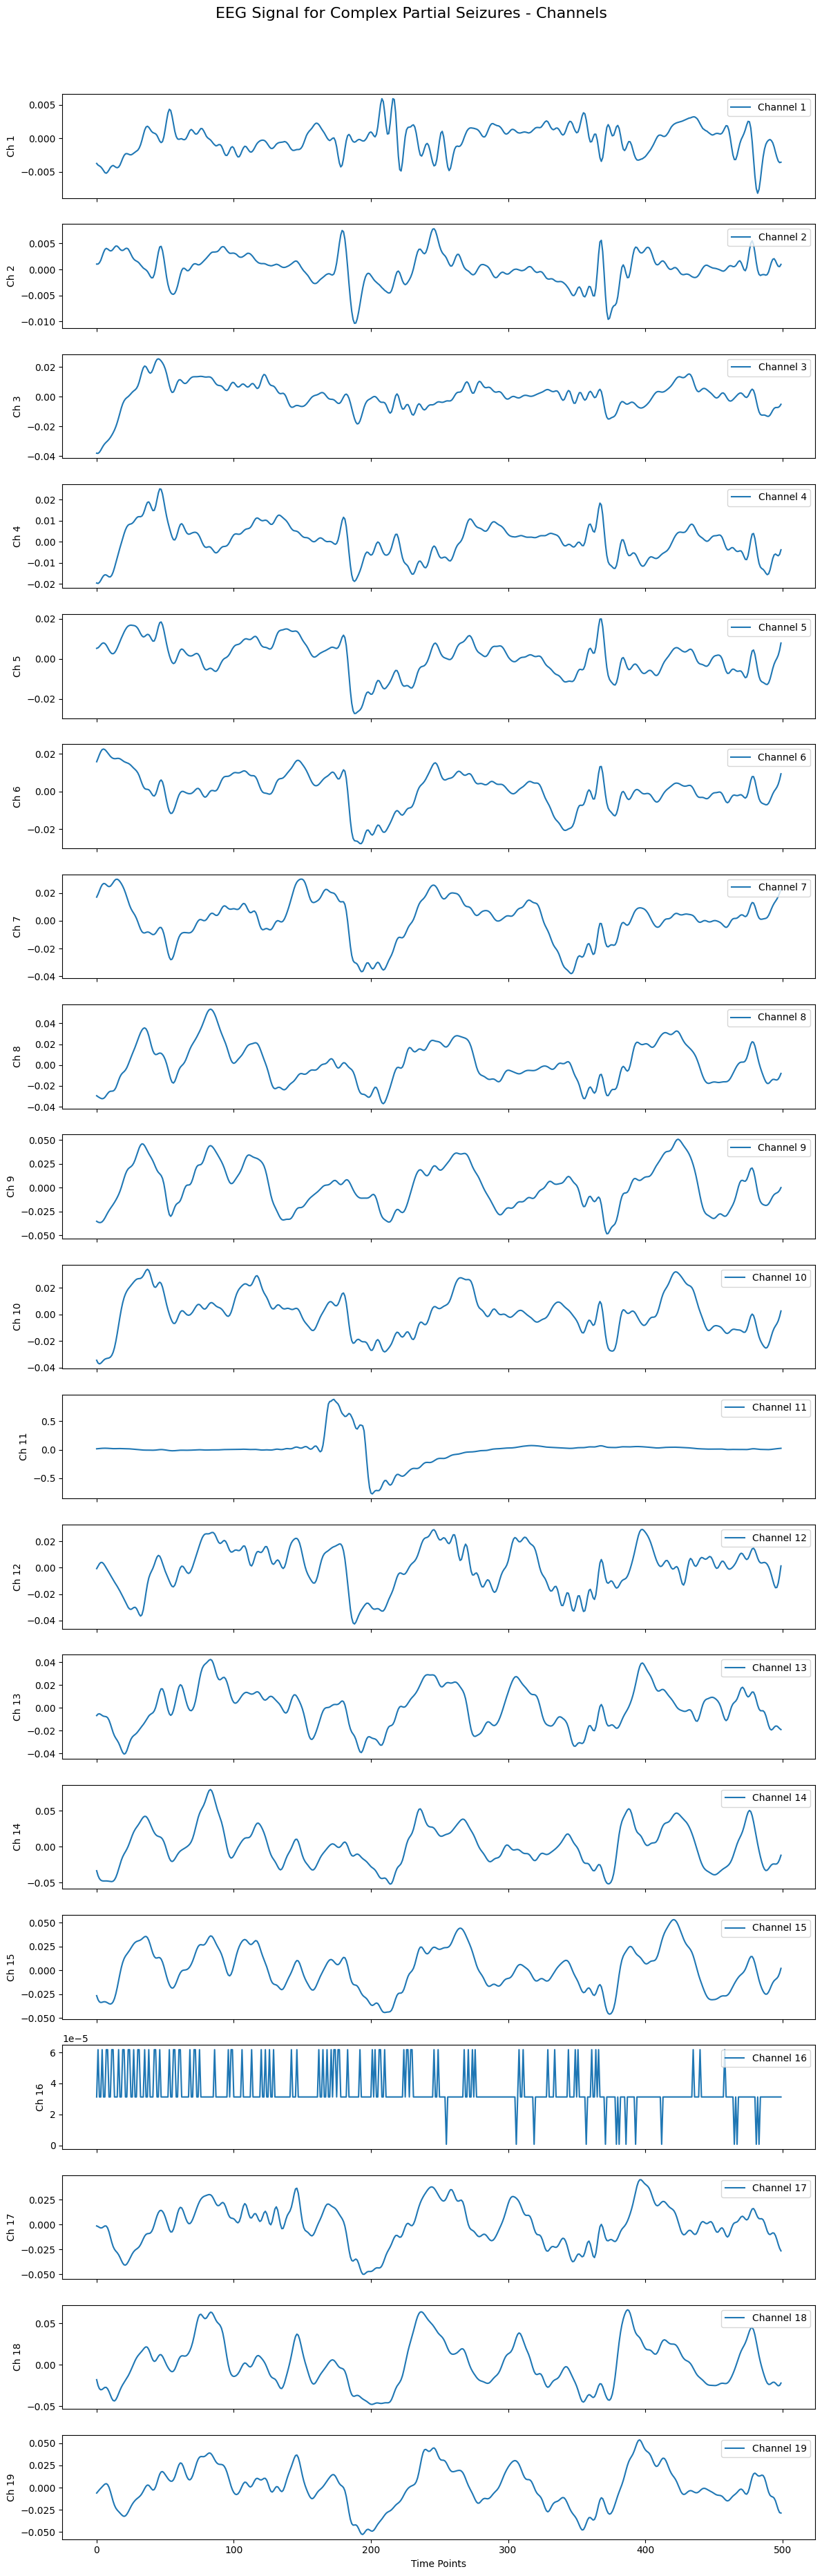

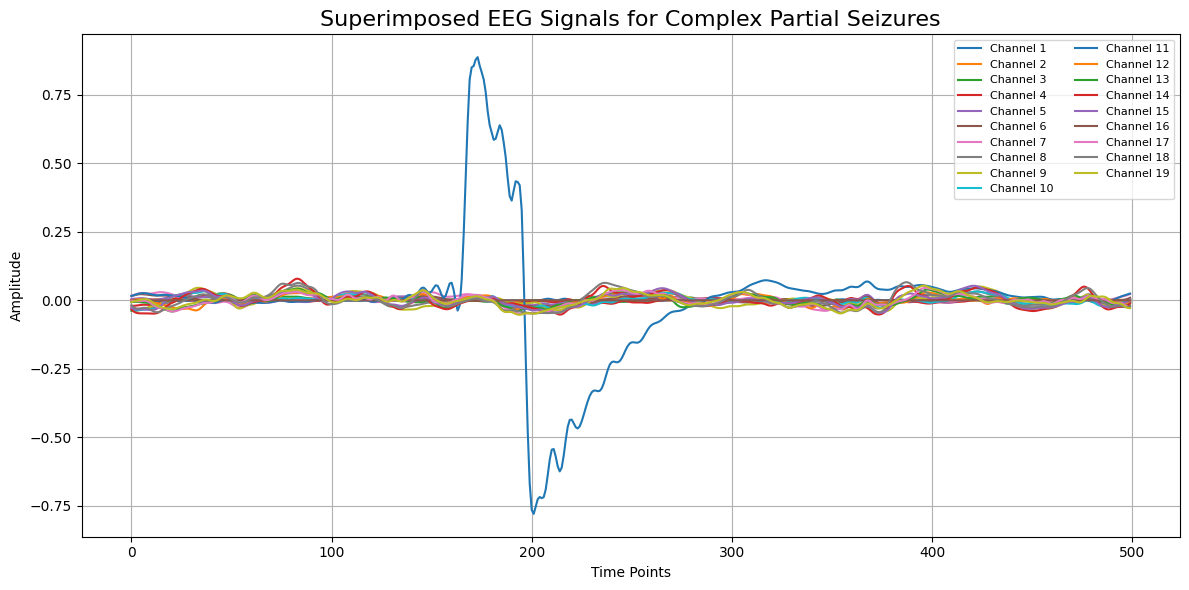

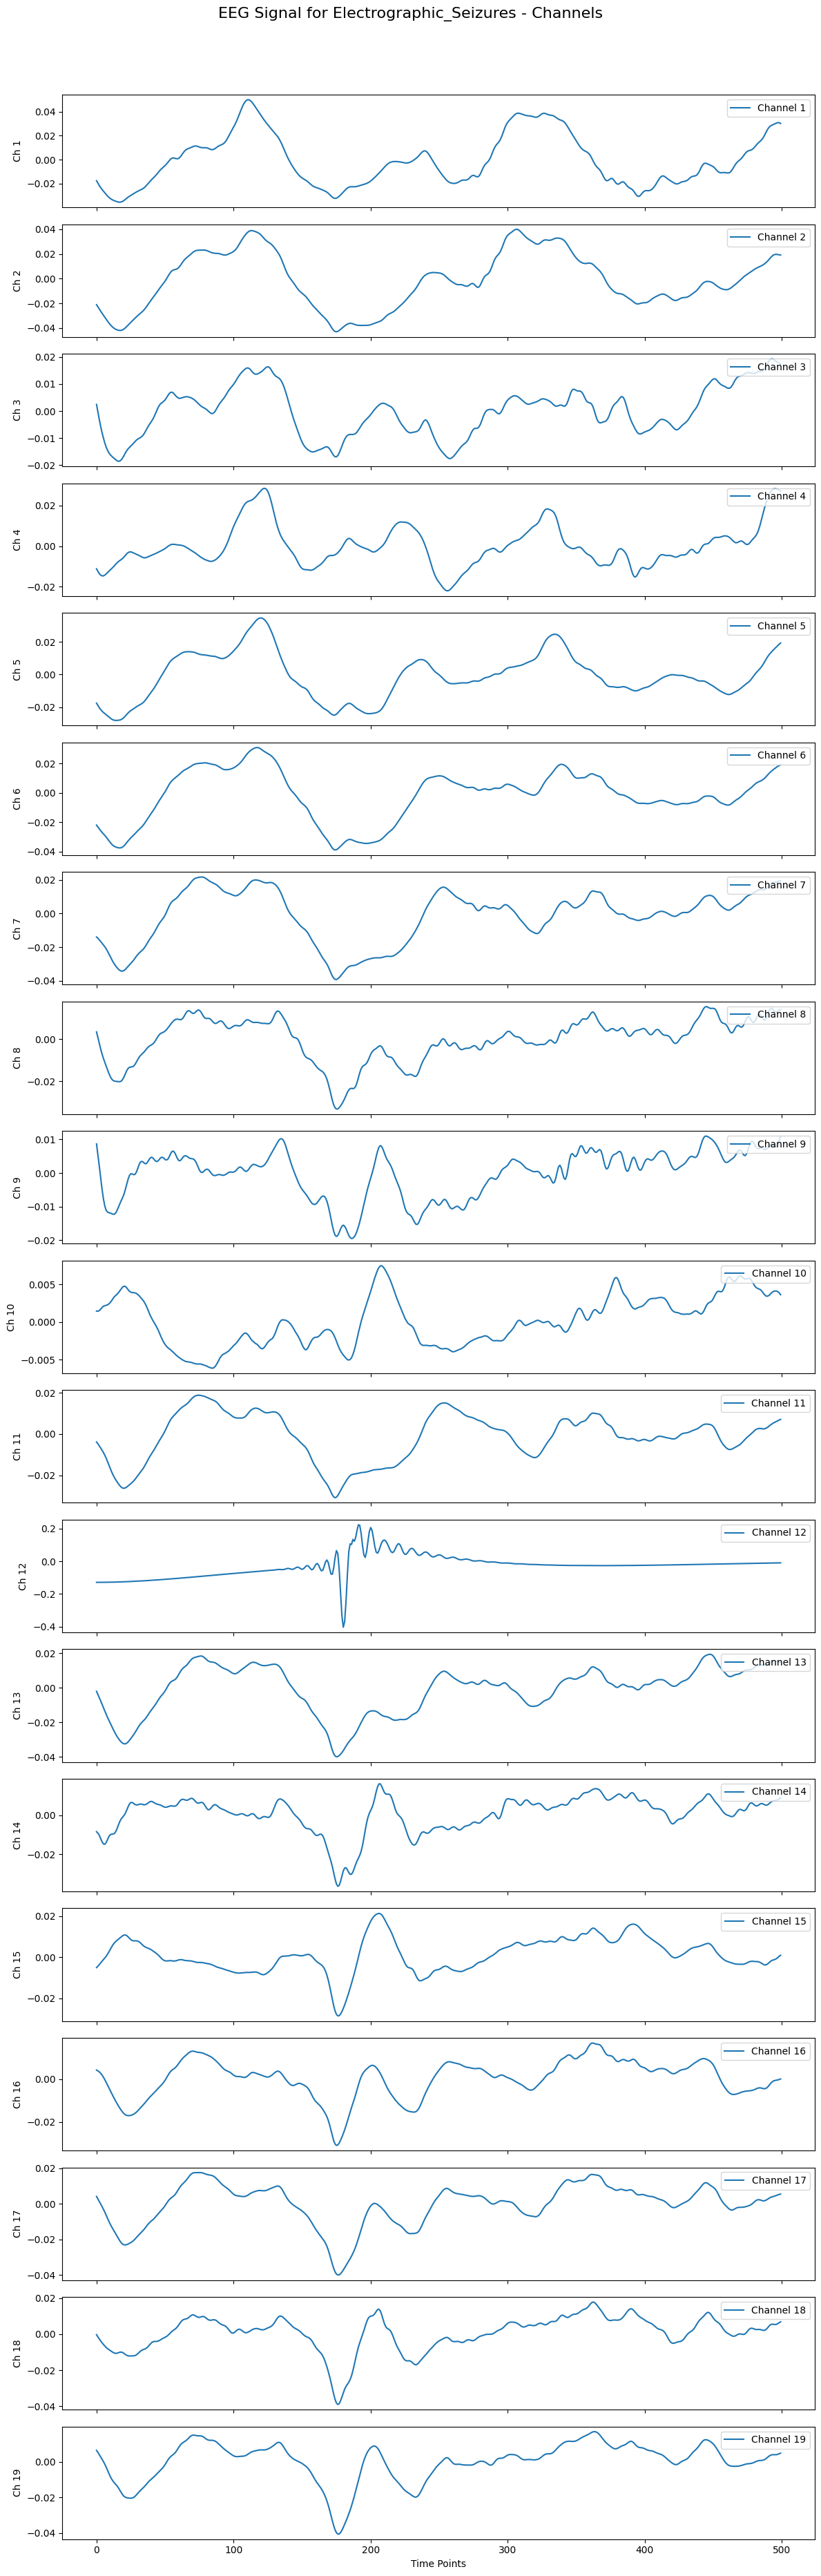

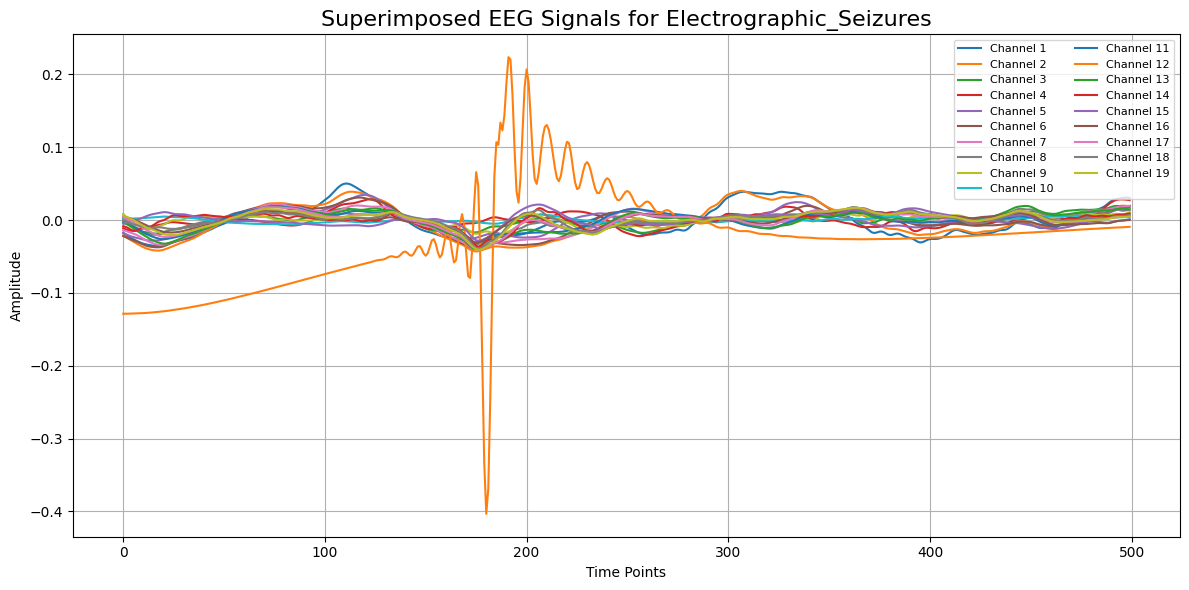

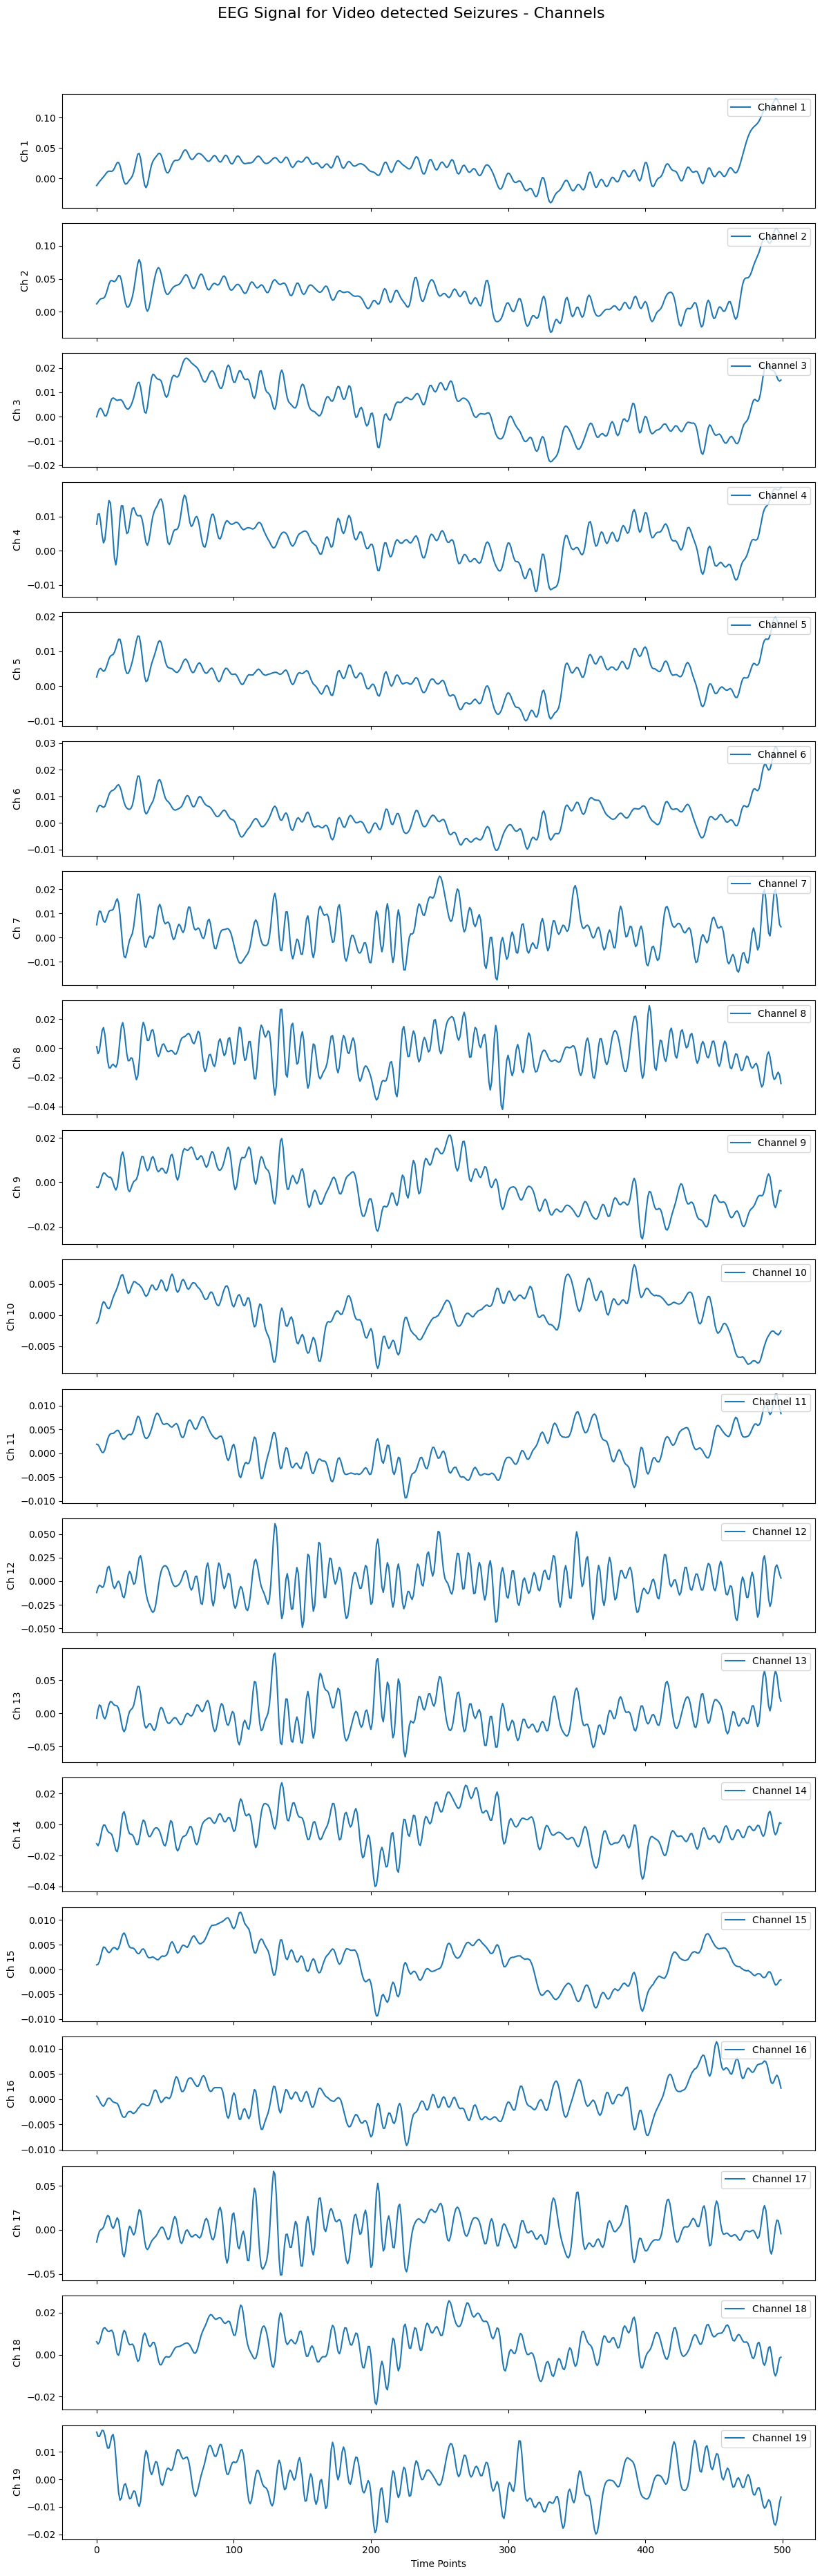

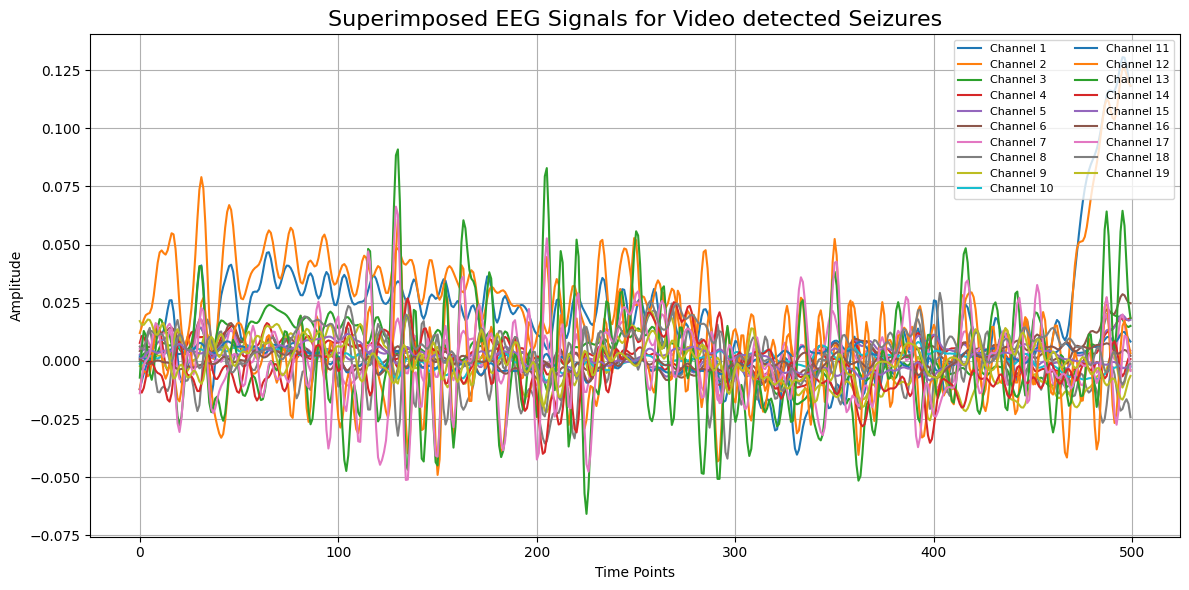

In [3]:
def plot_eeg_signals_for_classes(X, y, classes, time_points=500):
    """
    Parameters:
        X (numpy array): EEG data of shape (5608, 19, 500).
        y (numpy array): Labels for the EEG data of shape (5608,).
        classes (list): List of class labels to plot (e.g., [0, 1, 2, 3]).
        time_points (int): Number of time points in the signal.
    """
    for class_label in classes:
        # Select the samples belonging to the current class
        class_indices = np.where(y == class_label)[0]
    
        if class_indices.size > 0:
            sample_index = class_indices[0]
            X_sample = X[sample_index]
            label = class_label

            type = {0 : "Normal", 1 : "Complex Partial Seizures", 2: "Electrographic_Seizures", 3 : "Video detected Seizures" }

            
            # Plot separate channels for the current class
            fig, axs = plt.subplots(19, 1, figsize=(12, 2 * 19), sharex=True)
            fig.suptitle(f"EEG Signal for {type[label]} - Channels", fontsize=16)
            for i in range(19):  # 19 channels
                axs[i].plot(range(time_points), X_sample[i], label=f'Channel {i + 1}')
                axs[i].set_ylabel(f'Ch {i + 1}')
                axs[i].legend(loc='upper right')
            
            axs[-1].set_xlabel("Time Points")
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate title
            plt.show()

            # Plot superimposed channels for the current class
            plt.figure(figsize=(12, 6))
            for i in range(19):
                plt.plot(range(time_points), X_sample[i], label=f'Channel {i + 1}')
            
            plt.title(f"Superimposed EEG Signals for {type[label]}", fontsize=16)
            plt.xlabel("Time Points")
            plt.ylabel("Amplitude")
            plt.legend(loc='upper right', ncol=2, fontsize=8)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

# Example usage
plot_eeg_signals_for_classes(X, y, classes=[0, 1, 2, 3])

In [4]:
def compute_metrics(x, y):
    """
    Compute basic statistical metrics for one sample from each class.
    
    Args:
        x: EEG data array (n_samples, n_channels, n_timepoints)
        y: Labels array (n_samples,)
    """
    class_names = {
        0: 'Normal',
        1: 'Complex Partial Seizures',
        2: 'Electrographic Seizures',
        3: 'Video detected Seizures'
    }
    
    for class_label in range(4):
        # Get first sample of current class
        sample_idx = np.where(y == class_label)[0][0]
        sample_data = x[sample_idx]
        
        print(f"\n{'='*50}")
        print(f"Metrics for {class_names[class_label]}")
        print(f"{'='*50}")
        
        for ch in range(19):
            signal = sample_data[ch]
            
            # Calculate zero crossings
            zero_crossings = np.where(np.diff(np.signbit(signal)))[0]
            zcr = len(zero_crossings) / len(signal)
            
            # Calculate metrics
            metrics = {
                'Mean': np.mean(signal),
                'Zero Crossing Rate': zcr,
                'Range': np.ptp(signal),
                'Energy': np.sum(signal**2),
                'RMS': np.sqrt(np.mean(signal**2)),
                'Variance': np.var(signal)
            }
            
            print(f"\nChannel {ch+1}:")
            for metric, value in metrics.items():
                print(f"{metric}: {value:.4f}")
                
compute_metrics(X, y)


Metrics for Normal

Channel 1:
Mean: -0.0003
Zero Crossing Rate: 0.0380
Range: 0.0692
Energy: 0.1459
RMS: 0.0171
Variance: 0.0003

Channel 2:
Mean: -0.0005
Zero Crossing Rate: 0.0160
Range: 0.0384
Energy: 0.0303
RMS: 0.0078
Variance: 0.0001

Channel 3:
Mean: -0.0003
Zero Crossing Rate: 0.0100
Range: 0.0482
Energy: 0.0565
RMS: 0.0106
Variance: 0.0001

Channel 4:
Mean: -0.0028
Zero Crossing Rate: 0.0100
Range: 0.0793
Energy: 0.1592
RMS: 0.0178
Variance: 0.0003

Channel 5:
Mean: -0.0008
Zero Crossing Rate: 0.0100
Range: 0.0231
Energy: 0.0149
RMS: 0.0055
Variance: 0.0000

Channel 6:
Mean: -0.0013
Zero Crossing Rate: 0.0160
Range: 0.0340
Energy: 0.0304
RMS: 0.0078
Variance: 0.0001

Channel 7:
Mean: -0.0008
Zero Crossing Rate: 0.0180
Range: 0.0612
Energy: 0.0842
RMS: 0.0130
Variance: 0.0002

Channel 8:
Mean: 0.0006
Zero Crossing Rate: 0.0160
Range: 0.0577
Energy: 0.0831
RMS: 0.0129
Variance: 0.0002

Channel 9:
Mean: -0.0007
Zero Crossing Rate: 0.0200
Range: 0.0629
Energy: 0.1171
RMS: 0.0153


---
### **General Trends**
1. **Normal Metrics:**
   - Low Zero Crossing Rate (ZCR) indicates relatively stable signals without high-frequency oscillations.
   - Energy and RMS values are consistently lower compared to seizure metrics.
   - Variance and range are minimal, reflecting low signal fluctuation.

2. **Complex Partial Seizures:**
   - Higher ZCRs than normal, indicating more frequent oscillations or noise.
   - Channels like 8, 9, 11, and 14 show significant increases in energy and range compared to normal, suggesting more prominent signal spikes.

3. **Electrographic Seizures:**
   - A noticeable increase in energy and RMS in several channels (e.g., Channels 1, 2, 12).
   - Channels 12 and 13 show exceptionally high energy and RMS values, indicating significant activity related to seizure events.
   - Lower ZCR compared to complex partial seizures, indicating fewer high-frequency oscillations but higher amplitude.

4. **Video-detected Seizures:**
   - Anomalously high mean values in Channels 1 and 2, suggesting possible artifacts or strong baseline shifts.
   - Elevated energy and RMS in specific channels (e.g., 1, 2, 13) highlight significant signal activity.
   - High ZCR in some channels (e.g., 8, 12, 13) reflects frequent transitions in signal polarity.

---

### **Channel-Specific Observations**
1. **Channel 11 (Complex Partial Seizures):**

   
   - Very high energy (24.6) and RMS (0.2218), possibly indicating a focal area for seizure activity.

3. **Channel 12 (Electrographic Seizures):**
   - Drastic energy spike (2.6648) and high RMS (0.0730), marking it as a critical channel for detecting electrographic seizures.

4. **Channels 8 and 9 (Complex Partial & Video-detected Seizures):**
   - High range and energy in these channels across seizure types, suggesting their importance in classification.

5. **Channels 1 and 2 (Video-detected Seizures):**
   - Elevated mean values and energy, possibly due to motion artifacts or heightened activity during seizures.

---

### **Potential Features for Classification**
1. **Energy and RMS:**
   - Marked increase in seizures, especially in Channels 11, 12, and 13.
   - Useful for distinguishing between seizure and non-seizure states.

2. **Range:**
   - Clear distinction between normal and seizure types, especially in Channels 8, 9, and 12.

3. **Zero Crossing Rate:**
   - Higher in complex partial seizures and video-detected seizures.
   - Lower in electrographic seizures despite high energy, differentiating these seizure types.

4. **Variance:**
   - Variance is higher during seizures, especially in channels with significant activity (e.g., 11, 12, 13).

---

